In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nilearn
import nibabel as nib
import nilearn.plotting as nlplt
import cv2
import glob
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage
from skimage.transform import rotate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_path = "../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*"
img_dir = glob.glob(train_path)
csv_list = glob.glob(train_path + 'csv')
for i in csv_list:
    img_dir.remove(i)

img_dir.remove(train_path.replace("*", "") + 'BraTS20_Training_355')
img_dir = img_dir[0:100]

train_img, val_img = train_test_split(img_dir, test_size=0.2)
train_img, test_img = train_test_split(train_img, test_size=0.3)

In [3]:
view_img_idx = random.randint(0, len(train_img)-1)
data = sorted(glob.glob(train_img[view_img_idx] + '/*'))
view_img = {
    'flair': nib.load(data[0]).get_fdata(),
    't1': nib.load(data[2]).get_fdata(),
    't1ce': nib.load(data[3]).get_fdata(),
    't2': nib.load(data[4]).get_fdata(),
    'mask': nib.load(data[1]).get_fdata()
}

In [4]:
segment_classes = {
    0: 'Not tumor',
    1: 'Necrotic',
    2: 'Edema',
    3: 'Enhancing'
}

In [5]:
def view_data():
    fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(1, 5, figsize=(20, 10))
    s = 25
    axis1.imshow(view_img['flair'][:, :,
               view_img['flair'].shape[0]//2 - s], cmap='gray')
    axis1.set_title('Flair')
    axis2.imshow(
        view_img['t1'][:, :, view_img['t1'].shape[0]//2 - s], cmap='gray')
    axis2.set_title('T1')
    axis3.imshow(
        view_img['t1ce'][:, :, view_img['t1ce'].shape[0]//2 - s], cmap='gray')
    axis3.set_title('T1CE')
    axis4.imshow(
        view_img['t2'][:, :, view_img['t2'].shape[0]//2 - s], cmap='gray')
    axis4.set_title('T2')
    axis5.imshow(view_img['mask']
               [:, :, view_img['mask'].shape[0]//2 - s])
    axis5.set_title('Mask')

def show_montage():
    fig, axis = plt.subplots(1, 1, figsize=(15, 15))
    axis.imshow(rotate(montage(view_img['flair'][50:-50,:, :]), 90, resize=True), cmap='gray')

def view_mri():
    img = nilearn.image.load_img(data[0])
    msk = nilearn.image.load_img(data[1])
    fig, axes = plt.subplots(nrows=4, figsize=(30,30))
    nlplt.plot_anat(img, title='ANAT', axes=axes[0])
    nlplt.plot_epi(img, title='EPI', axes=axes[1])
    nlplt.plot_img(img, title='IMG', axes=axes[2])
    nlplt.plot_roi(msk, title='ROI', bg_img=img, axes=axes[3])
    plt.show()
    

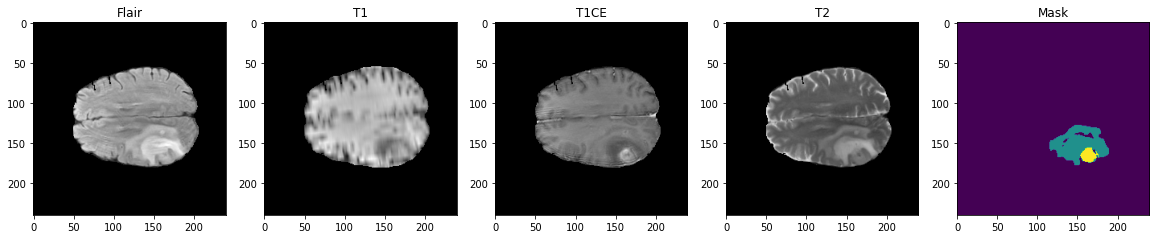

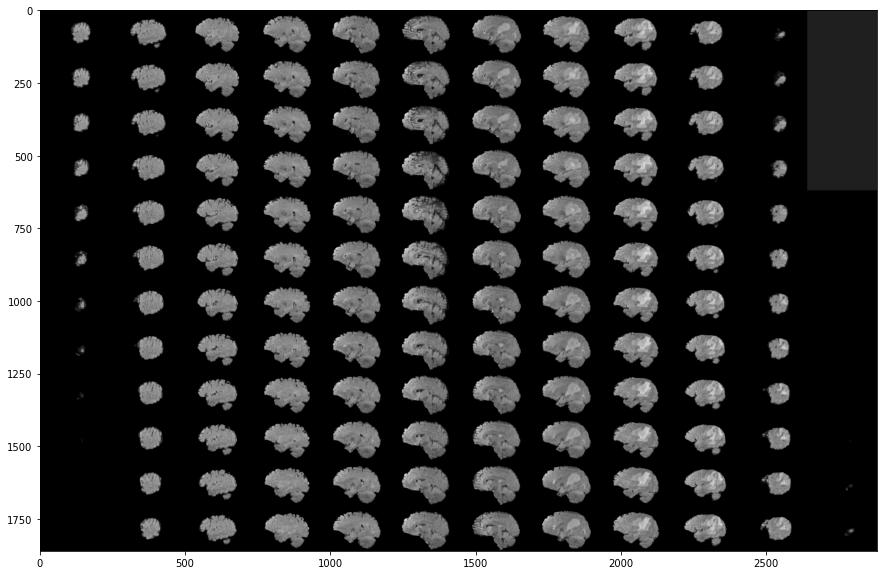

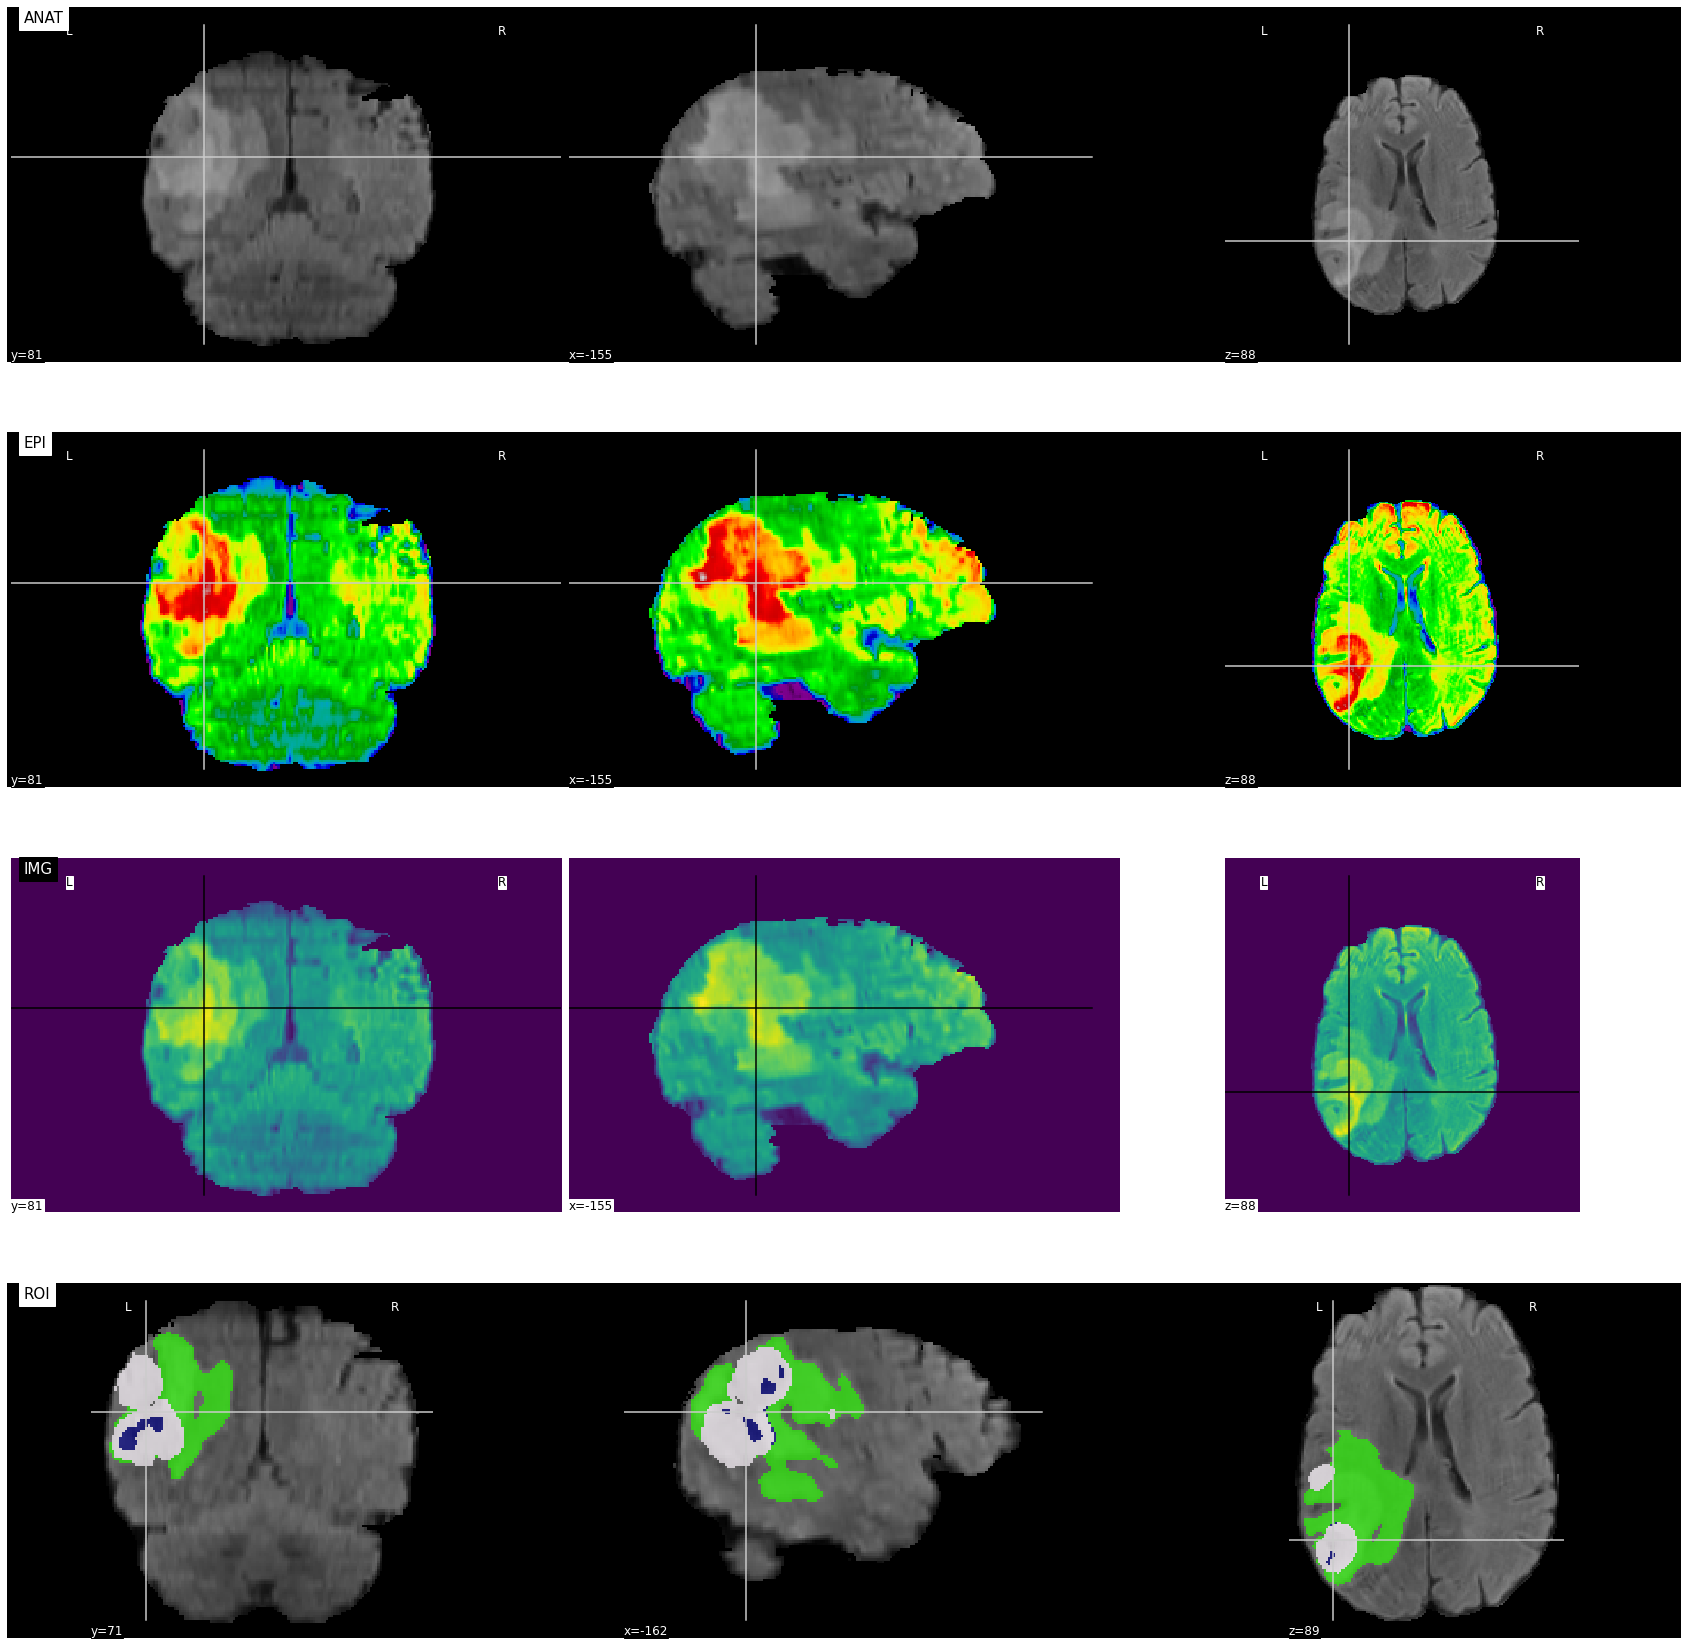

In [6]:
view_data()
show_montage()
view_mri()